In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader as pdr

#factor = pdr.data.DataReader('F-F_Research_Data_Factors', 'famafrench',start='1-1-1926')[0]

page = pd.read_html("https://en.wikipedia.org/wiki/DAX")
tickers = page[3].iloc[:,3]

dax = pd.DataFrame()
df_mcap = pd.DataFrame()

for i in tickers:
    display(i)
     
    data= yf.download(i,interval="1d",start="2019-09-01",end="2021-11-30")
    
    data= pd.DataFrame(data["Adj Close"])
    data.columns= [i]
    dax= pd.concat([dax,data],axis=1)
    
    
    stk= yf.Ticker(i)
    try:
        stk.info["floatShares"]
    except:
        stk.info["floatShares"]= None
    try:
        stk.info["sharesOutStanding"]
    except:   
        stk.info["sharesOutStanding"] = None
    if stk.info["floatShares"]:
        mcap = data * stk.info["floatShares"]
    elif stk.info["sharesOutStanding"]:
        mcap = data * stk.info["sharesOutStanding"]
    else:
        mcap = data * (stk.info["marketCap"]/stk.info["previousClose"])
        
    df_mcap = pd.concat([df_mcap,mcap],axis=1)    
    
    
dax.drop("ENR.DE",axis=1,inplace=True)    

'ADS.DE'

[*********************100%***********************]  1 of 1 completed


'ALV.DE'

[*********************100%***********************]  1 of 1 completed


'BAS.DE'

[*********************100%***********************]  1 of 1 completed


'BAYN.DE'

[*********************100%***********************]  1 of 1 completed


'BMW.DE'

[*********************100%***********************]  1 of 1 completed


'CON.DE'

[*********************100%***********************]  1 of 1 completed


'1COV.DE'

[*********************100%***********************]  1 of 1 completed


'DAI.DE'

[*********************100%***********************]  1 of 1 completed


'DHER.DE'

[*********************100%***********************]  1 of 1 completed


'DBK.DE'

[*********************100%***********************]  1 of 1 completed


'DB1.DE'

[*********************100%***********************]  1 of 1 completed


'DPW.DE'

[*********************100%***********************]  1 of 1 completed


'DTE.DE'

[*********************100%***********************]  1 of 1 completed


'DWNI.DE'

[*********************100%***********************]  1 of 1 completed


'EOAN.DE'

[*********************100%***********************]  1 of 1 completed


'FRE.DE'

[*********************100%***********************]  1 of 1 completed


'FME.DE'

[*********************100%***********************]  1 of 1 completed


'HEI.DE'

[*********************100%***********************]  1 of 1 completed


'HEN3.DE'

[*********************100%***********************]  1 of 1 completed


'IFX.DE'

[*********************100%***********************]  1 of 1 completed


'LIN.DE'

[*********************100%***********************]  1 of 1 completed


'MRK.DE'

[*********************100%***********************]  1 of 1 completed


'MTX.DE'

[*********************100%***********************]  1 of 1 completed


'MUV2.DE'

[*********************100%***********************]  1 of 1 completed


'RWE.DE'

[*********************100%***********************]  1 of 1 completed


'SAP.DE'

[*********************100%***********************]  1 of 1 completed


'SIE.DE'

[*********************100%***********************]  1 of 1 completed


'ENR.DE'

[*********************100%***********************]  1 of 1 completed


'VOW3.DE'

[*********************100%***********************]  1 of 1 completed


'VNA.DE'

[*********************100%***********************]  1 of 1 completed


In [2]:
import matplotlib.pyplot as plt

In [3]:
PWI = dax.sum(axis=1)
PWI = pd.DataFrame(PWI.rename("PWI"))


EWI= dax.pct_change().mean(axis=1)
EWI[0]=0
EWI += 1
EWI = EWI.cumprod()
EWI = pd.DataFrame(EWI.rename("EWI"))

VWI = df_mcap.sum(axis=1)
VWI = pd.DataFrame(VWI.rename("VWI"))

# DAX_Index = pd.DataFrame( yf.download("DAX",interval="1d",start="2021-01-05",end="2021-11-30")["Adj Close"])
# DAX_Index.columns=["Actual DAX"]

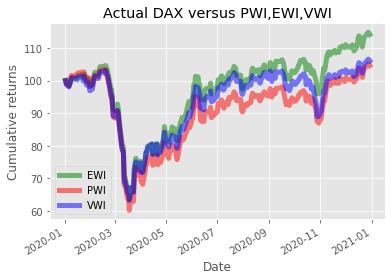

In [4]:
TS = EWI.join([PWI,VWI]).loc["2020":"2020-12-30"]
TS = TS/TS.iloc[0]*100

plt.style.use("ggplot")
fig = TS.plot(color=["Green","red","blue","yellow"],alpha=.5,linewidth=5)

plt.title("Actual DAX versus PWI,EWI,VWI")
plt.legend(loc="best")
plt.ylabel("Cumulative returns")
plt.show()

In [5]:
TS

#Return for msrp should look something like this

,EWI,PWI,VWI
Date,,,
2020-01-02,100.000000,100.000000,100.000000
2020-01-03,99.102777,99.047347,98.801519
2020-01-06,98.244036,98.426935,98.089552
2020-01-07,99.113593,99.247601,98.820642
2020-01-08,99.860119,100.070519,99.504830
...,...,...,...
2020-12-22,111.683708,102.210014,103.631852
2020-12-23,113.151440,103.641755,104.978408
2020-12-28,114.824038,105.043412,106.581678


In [6]:
from scipy.optimize import Bounds
import pandas_datareader as pdr
from numpy.linalg import inv
from scipy.optimize import minimize
import seaborn as sns
def pvar(W,S):
    return(W.T @ S @ W)

def pret(w, R):
    return (w @ R)

def sharpe(w,ER,S):
    return -(w.T@ER)/((w.T@S@w)**.5)

def msrp(ER,S):
    ONE = np.ones(len(S))

    return (inv(S) @ ER )/ (ONE.T @ inv(S)@ ER)

def sharpe(w, ER, S):
    return -(w @ ER)/np.sqrt(w @ S @ w)



def gmvp(S):
    ONE = np.ones(len(S))

    return (inv(S)@ONE)/ (ONE.T @ inv(S)@ONE)
def NMSRPnoSS(ER,S):
    
    cons= ({"type":"eq","fun":lambda x :np.sum(x)-1})
    bounds= Bounds(0,1)
    x0 = gmvp(S)
    return  minimize(sharpe,x0,method="SLSQP",args=(ER,S),constraints=cons,options={"disp":True,"ftol":1e-9},bounds=bounds)


def NGMVPnoSS(S):
    cons= ({"type":"eq","fun":lambda x :np.sum(x)-1})
    bounds= Bounds(0,1)
    x0 =  gmvp(S)
    return  minimize(pvar,x0,method="SLSQP",args=S,constraints=cons, options={"disp":True,"ftol": 1e-9},bounds=bounds)
    
    

In [7]:
df_ER = (dax.pct_change()*100).shift(1)
#df_ER.drop("ENR.DE",axis=1,inplace=True)
df_R = dax.pct_change()*100


In [8]:
df_ER

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BMW.DE,CON.DE,1COV.DE,DAI.DE,DHER.DE,DBK.DE,...,IFX.DE,LIN.DE,MRK.DE,MTX.DE,MUV2.DE,RWE.DE,SAP.DE,SIE.DE,VOW3.DE,VNA.DE
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-04,0.074018,-0.907959,-1.083155,-0.479620,-0.214762,-1.257057,-0.960117,0.997662,-1.152171,-0.361006,...,0.936254,-0.321536,-0.020436,-0.909809,-0.362800,0.521216,-0.055376,-0.707100,-0.259106,-0.846314
2019-09-05,0.980021,0.640891,1.431942,1.671690,1.142377,3.302593,0.820286,2.196390,-1.495492,1.781401,...,1.905985,-0.322592,0.143092,1.157679,0.910323,0.407408,0.849492,1.479899,1.148482,-0.606482
2019-09-06,0.640911,1.019898,1.328686,-1.496070,2.013418,4.447216,2.243589,3.138496,1.763789,5.132004,...,5.822943,0.029428,-0.714439,-2.920280,0.225528,-2.360753,2.069222,0.383783,1.946474,-2.124286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,-1.204177,0.147967,0.519396,0.135042,1.695281,1.511722,0.603908,1.314178,-2.572099,0.369549,...,-0.683429,0.904288,0.135748,0.718821,0.020228,-1.007639,-3.352394,0.463918,-0.763953,-2.225419
2021-11-24,-2.545261,0.098496,1.647022,1.006225,-0.358722,-0.614300,-0.070623,-1.022315,-4.800000,2.908689,...,-3.720545,-1.132911,-2.666068,0.658804,0.889786,0.246767,-1.742563,-1.654696,-1.093379,-3.230542
2021-11-25,-1.269087,-0.073798,-1.683878,-2.495635,-2.064808,-1.929198,-2.473494,-1.854729,-0.588233,2.415022,...,-0.109030,-0.136814,0.139277,2.072532,1.643618,0.707691,-0.501923,-0.913000,-2.774957,5.013533


In [9]:
W_size=60
AvgER_rolling = df_ER.rolling(W_size).mean()
CovER_rolling = df_ER.rolling(W_size).cov()

Backtest_R = pd.DataFrame(index=df_R.index,columns=["GMVP","MSRP","EW","NMSRPnoSS","NGMVPnoSS"])

for d in df_ER.index:
    ER = AvgER_rolling.loc[d]
    S = CovER_rolling.loc[d]
    R = df_R.loc[d]
    print(d)
    Backtest_R.loc[d,"GMVP"]= pret(gmvp(S),R)
    Backtest_R.loc[d,"MSRP"]= pret(msrp(ER,S),R)
   # Backtest_R.loc[d,"NGMVPnoSS"]= pret(NGMVPnoSS(S).x,R)
    Backtest_R.loc[d,"NMSRPnoSS"]= pret(NMSRPnoSS(ER,S).x,R)

Backtest_R.loc[:,"EW"] = df_R.mean(axis=1) 
Backtest_R = Backtest_R.iloc[( W_size):]

2019-09-02 00:00:00
Iteration limit reached    (Exit mode 9)
            Current function value: nan
            Iterations: 100
            Function evaluations: 4120
            Gradient evaluations: 101
2019-09-03 00:00:00
Iteration limit reached    (Exit mode 9)
            Current function value: nan
            Iterations: 100
            Function evaluations: 4120
            Gradient evaluations: 101
2019-09-04 00:00:00
Iteration limit reached    (Exit mode 9)
            Current function value: nan
            Iterations: 100
            Function evaluations: 4120
            Gradient evaluations: 101
2019-09-05 00:00:00
Iteration limit reached    (Exit mode 9)
            Current function value: nan
            Iterations: 100
            Function evaluations: 4120
            Gradient evaluations: 101
2019-09-06 00:00:00
Iteration limit reached    (Exit mode 9)
            Current function value: nan
            Iterations: 100
            Function evaluations: 4120
        

In [10]:
Backtest_R

,GMVP,MSRP,EW,NMSRPnoSS,NGMVPnoSS
Date,,,,,
2019-11-26,NaN,NaN,0.147012,NaN,NaN
2019-11-27,0.523244,-1.220513,0.342900,0.418271,NaN
2019-11-28,0.012951,-0.83803,-0.287202,-0.176916,NaN
2019-11-29,0.97648,-1.031591,-0.174807,0.052473,NaN
2019-12-02,-1.32263,-0.558705,-1.829754,-1.517813,NaN
...,...,...,...,...,...
2021-11-23,-1.953476,13.331495,-0.979623,-1.671807,NaN
2021-11-24,0.061019,6.017859,-0.204836,-1.263334,NaN
2021-11-25,0.247831,-0.619995,0.106960,0.226694,NaN


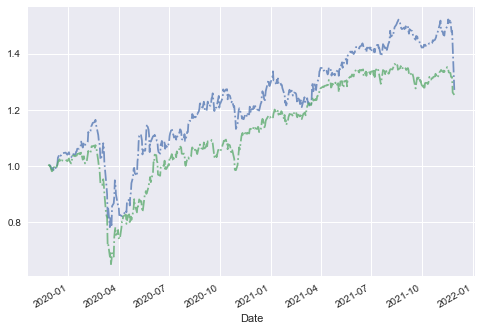

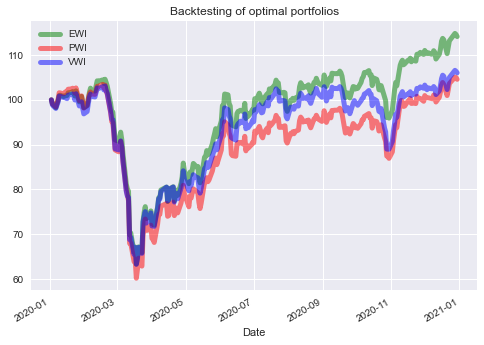

In [11]:
plt.style.use('seaborn')
CumRet = (1 + Backtest_R.divide(100)).cumprod()
#CumRet['GMVP'].plot(alpha=0.75, linestyle="--")
CumRet['NMSRPnoSS'].plot(alpha=0.75, linestyle="-.")
CumRet['EW'].plot(alpha=0.75, linestyle="-.")
TS.plot(color=["Green","red","blue","yellow"],alpha=.5,linewidth=5)
plt.legend()
plt.title('Backtesting of optimal portfolios')
plt.show()

In [12]:
df = (TS/TS.iloc[0]).join(CumRet)

In [13]:
df.drop(["MSRP","NGMVPnoSS",],axis=1,inplace=True)


In [15]:
df

,EWI,PWI,VWI,GMVP,EW,NMSRPnoSS
Date,,,,,,
2020-01-02,1.000000,1.000000,1.000000,0.999475,1.027790,1.04995
2020-01-03,0.991028,0.990473,0.988015,0.991716,1.018568,1.040507
2020-01-06,0.982440,0.984269,0.980896,0.991585,1.009742,1.031842
2020-01-07,0.991136,0.992476,0.988206,0.991098,1.018679,1.034809
2020-01-08,0.998601,1.000705,0.995048,0.993721,1.026352,1.037876
...,...,...,...,...,...,...
2020-12-22,1.116837,1.022100,1.036319,1.204177,1.147874,1.248477
2020-12-23,1.131514,1.036418,1.049784,1.212827,1.162959,1.267856
2020-12-28,1.148240,1.050434,1.065817,1.233411,1.180150,1.30832


<AxesSubplot:xlabel='Date'>

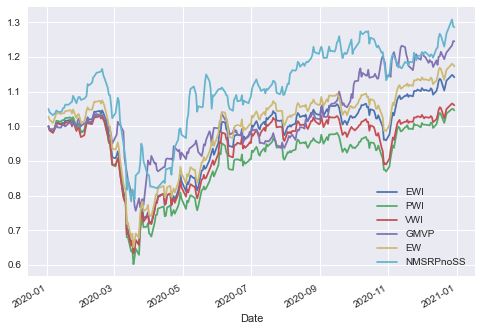

In [16]:
df.plot()

In [17]:
OUT_OF_SAMPLE_TS = EWI.join([PWI,VWI]).loc["2021":]
OUT_OF_SAMPLE_TS = OUT_OF_SAMPLE_TS/OUT_OF_SAMPLE_TS.iloc[0]
OUT_OF_SAMPLE_CUM_RET = (1 + (Backtest_R.loc["2021":]).divide(100)).cumprod()

OUT_OF_SAMPLE_DF = OUT_OF_SAMPLE_TS.join(OUT_OF_SAMPLE_CUM_RET)
OUT_OF_SAMPLE_DF.drop("MSRP",inplace=True,axis=1)
OUT_OF_SAMPLE_DF

,EWI,PWI,VWI,GMVP,EW,NMSRPnoSS,NGMVPnoSS
Date,,,,,,,
2021-01-04,1.000000,1.000000,1.000000,1.002501,1.005021,1.025917,NaN
2021-01-05,0.995652,0.995772,0.994369,0.991887,1.000651,1.040728,NaN
2021-01-06,1.006999,1.006677,1.012093,0.968859,1.012055,1.016415,NaN
2021-01-07,1.012512,1.006971,1.018154,0.968324,1.017596,1.015186,NaN
2021-01-08,1.019661,1.012915,1.024243,0.96439,1.024780,1.015586,NaN
...,...,...,...,...,...,...,...
2021-11-23,1.119011,1.095619,1.164875,0.915225,1.124629,1.164586,NaN
2021-11-24,1.116718,1.091954,1.159304,0.915784,1.122325,1.149874,NaN
2021-11-25,1.117913,1.091606,1.162155,0.918054,1.123526,1.15248,NaN


In [18]:
OUT_OF_SAMPLE_DF.drop(["NGMVPnoSS","EWI"],inplace=True,axis=1)


<AxesSubplot:xlabel='Date'>

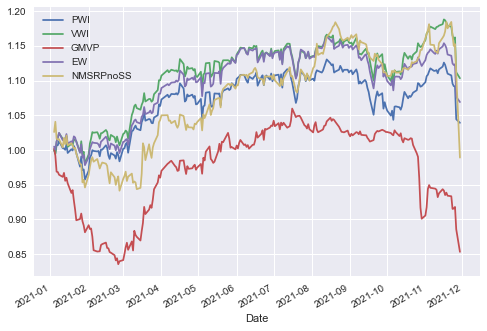

In [19]:
OUT_OF_SAMPLE_DF.plot()